In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DISTRIBUTIONS = ["Gaussian", "Bernoulli", "Poisson", "Gamma"]
BASELINE = ["TSGreedy"]
PROBS = [1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02]

In [3]:
T = pow(10, 3)
PERIOD = 50
N = 10
FOLDER = "epsilon_results"
REPEAT = 936
record_time = np.zeros(int(T/PERIOD))
for t in range(1, T+1):
    if t % PERIOD == 0:
        record_time[int(t/PERIOD)-1] = t
NAME_IN_PLOT = lambda name: f'ε-TS ε={name}'

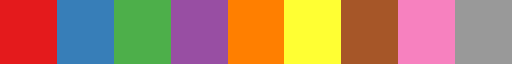

In [7]:
palette = plt.get_cmap('Set1')
palette

In [8]:
palette = plt.get_cmap('Set1')
colormap = {
    "ε-TS ε=1.0": palette(0),
    "ε-TS ε=0.8": palette(1),
    "ε-TS ε=0.5": palette(2),
    "ε-TS ε=0.3": palette(3),
    "ε-TS ε=0.2": palette(4),
    "ε-TS ε=0.1": palette(5),
    "ε-TS ε=0.05": palette(6),
    "ε-TS ε=0.02": palette(7),
}
linestyle = "solid"
# linestyles = {
#     "lower bound": "solid",
#     "KL_UCB":"dotted",
#     "KL_UCB_plus_plus":"dotted",
#     "TS":"dashed",
#     "MOTS":"dashdot", 
#     "ExpTS":"dashed", 
#     "ExpTS_plus": "dashdot",
#     "TSGreedy":"solid"
# }

In [9]:
def load_avg(BASELINE, N, DISTRIBUTION, PROB, T, repeat):
    data = np.zeros((repeat, int(T/PERIOD)))
    for i in range(repeat):
        file = "{}-{}-{}-{}-{}-{}.npy".format(BASELINE, N, DISTRIBUTION, T, round(PROB, 2), i)
        data_t = np.load(os.path.join(f'./{FOLDER}', file))
        data[i] = data_t
    return data

In [10]:
DISTRIBUTION = "Gaussian"

In [ ]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7))
for PROB in PROBS:
    data = load_avg(BASELINE, N, DISTRIBUTION, PROB, T, REPEAT)
    percentile_5 = np.percentile(data, 5, axis=0)
    percentile_95 = np.percentile(data, 95, axis=0)
    means = data.mean(axis=0)
    ax.plot(record_time, means, label="{}".format(NAME_IN_PLOT(PROB)), color=colormap[BASELINE], linestyle=linestyle)
    ax.fill_between(record_time, percentile_5, percentile_95, color=colormap[BASELINE], alpha=0.2)

ax.set_xlabel('t')  # Add an x-label to the axes.
ax.set_ylabel('regret')  # Add a y-label to the axes.
ax.set_title(f'N={N} {DISTRIBUTION}')  # Add a title to the axes.
ax.legend(loc="center left",ncol=1, bbox_to_anchor=(-0.55, 0.5), bbox_transform=ax.transAxes)  # Add a legend.
plt.savefig("epsilon_plot_results/{}_{}.pdf".format(N, DISTRIBUTION),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    )